<a href="https://colab.research.google.com/github/GreeshmaHarids/puthon_class/blob/main/Food_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Delivery Time Prediction
##  Predicting the delivery time based on the distance covered by the delivery partner to deliver the order.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("/content/Food_delivery dataset.csv")
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26
45592,0x5fb2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10:00,17:15:00,conditions Fog,Medium,2,Snack,scooter,1,No,Metropolitian,(min) 36


In [ ]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [ ]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [ ]:
df.shape

(45593, 20)

In [ ]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

## Data Cleaning

In [ ]:
#Replacing all NaN with np.nan
df.replace('NaN', float(np.nan), regex=True,inplace=True)
#Show count of NaN values in data
df.isna().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weatherconditions               616
Road_traffic_density            601
Festival                        228
ID                                0
Type_of_vehicle                   0
Type_of_order                     0
Vehicle_condition                 0
Time_Order_picked                 0
Delivery_person_ID                0
Order_Date                        0
Delivery_location_longitude       0
Delivery_location_latitude        0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
dtype: int64

In [ ]:
#Removing min from Tme_taken
df['Time_taken(min)']=df['Time_taken(min)'].apply(lambda x: int(x.split(" ")[1].strip()))

In [ ]:
#removing 'conditions' from Weatherconditions
df['Weatherconditions']=df['Weatherconditions'].str.replace('conditions',"")



*  Here Delivery_person_Age,Delivery_person_Ratings,Time_taken and multiple_deliveries are in object column converting to float

*   Converting date time datatypes

In [ ]:
df['Delivery_person_Age']=df['Delivery_person_Age'].astype(float)
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype(float)
df['multiple_deliveries']=df['multiple_deliveries'].astype(float)
df['Time_taken(min)']=df['Time_taken(min)'].astype(float)


df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")


In [ ]:
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0
5,0x9bb4,HYDRES09DEL03,22.0,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,Cloudy,Jam,0,Buffet,motorcycle,1.0,No,Urban,26.0
6,0x95b4,RANCHIRES15DEL01,33.0,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,19:15:00,19:30:00,Fog,Jam,1,Meal,scooter,1.0,No,Metropolitian,40.0
7,0x9eb2,MYSRES15DEL02,35.0,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,Cloudy,Medium,2,Meal,motorcycle,1.0,No,Metropolitian,32.0
8,0x1102,HYDRES05DEL02,22.0,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,Stormy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,34.0
9,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46.0


In [ ]:
df.dtypes

ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                   float64
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                     datetime64[ns]
Time_Orderd                            object
Time_Order_picked                      object
Weatherconditions                      object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                   float64
Festival                               object
City                                   object
Time_taken(min)                       float64
dtype: object

## Handling missing values
Visualizing these columns would be beneficial for identifying patterns and determining the optimal approach to handle null values for each feature.

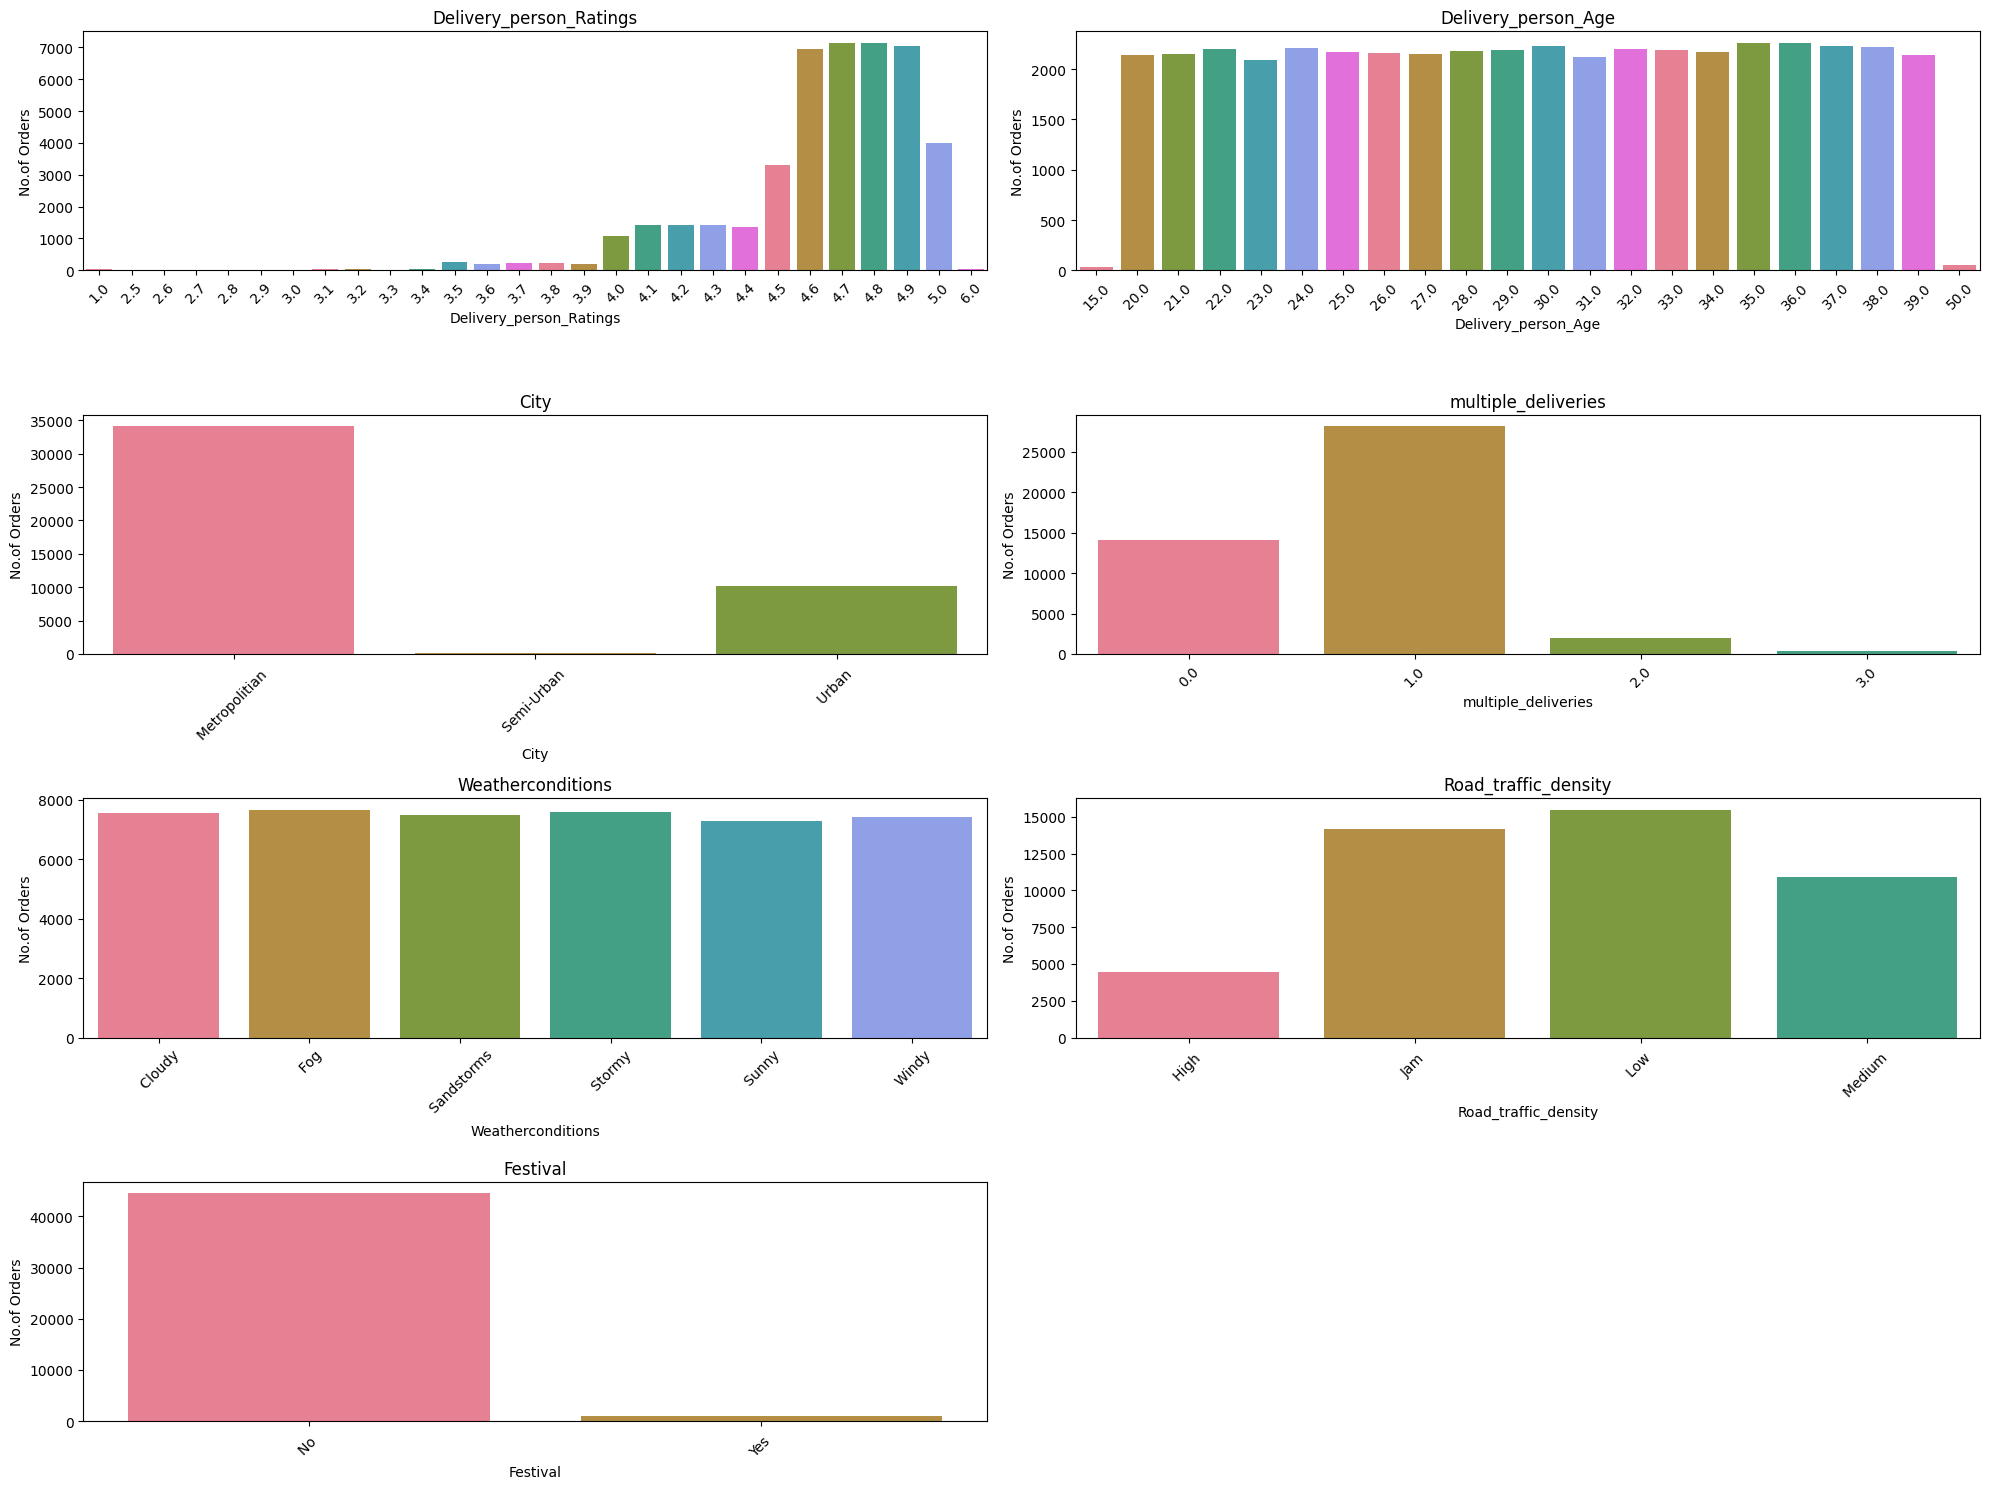

In [ ]:
#plotting count plot for columns with missing values
col_missing=['Delivery_person_Ratings','Delivery_person_Age','City','multiple_deliveries','Weatherconditions','Road_traffic_density','Festival']
num_plot=len(col_missing)

colors=sns.color_palette("husl",num_plot)
plt.figure(figsize=(20,15))
for i,j in zip(col_missing,range(1,8)):
  plt.subplot(4,2,j)
  sns.countplot(data=df,x=i,order=df[i].value_counts().sort_index().index,palette=colors)
  plt.xlabel(i)
  plt.ylabel('No.of Orders')
  plt.title(i)
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



*   For Delivery_person_Age and Weatherconditions, which display nearly uniform distributions, the missing values will be filled randomly.
*   As for Delivery_person_Ratings, which exhibits a left-skewed distribution, the missing values will be filled with the median.


*   For the remaining categorical columns, the missing values will be filled with the mode, representing the most frequently occurring value in each respective column.


*   For multiple_deliveries we use mean



In [ ]:
df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']),inplace=True)
df['Weatherconditions'].fillna(np.random.choice(df['Weatherconditions']),inplace=True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(),inplace=True)
df['Festival'].fillna(df['Festival'].mode()[0],inplace=True)
df['City'].fillna(df['City'].mode()[0],inplace=True)
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0],inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mean(),inplace=True)

In [ ]:
#describing non-numerical columns
df.describe(include='O').T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Time_Orderd,43862,176,21:55:00,461
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,6,Sandstorms,8111
Road_traffic_density,45593,4,Low,16078
Type_of_order,45593,4,Snack,11533
Type_of_vehicle,45593,4,motorcycle,26435
Festival,45593,2,No,44697
City,45593,3,Metropolitian,35293


Here ID, Delivery_person_ID have to be dropped since no.of unique values is high

In [ ]:
df.drop(df[['ID','Delivery_person_ID']],axis=1,inplace=True)

In [ ]:
#unique values in object columns

x=[df['Weatherconditions'],df['Road_traffic_density'],df['Type_of_order'],df['Type_of_vehicle'],df['Festival'],df['City']]
print("Unique values in each object columns\n")
for i in x:
  print(i.name)
  print(20*'-')
  print(i.value_counts(),"\n")

Unique values in each object columns

Weatherconditions
--------------------
Weatherconditions
 Sandstorms    8111
 Fog           7654
 Stormy        7586
 Cloudy        7536
 Windy         7422
 Sunny         7284
Name: count, dtype: int64 

Road_traffic_density
--------------------
Road_traffic_density
Low        16078
Jam        14143
Medium     10947
High        4425
Name: count, dtype: int64 

Type_of_order
--------------------
Type_of_order
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: count, dtype: int64 

Type_of_vehicle
--------------------
Type_of_vehicle
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64 

Festival
--------------------
Festival
No      44697
Yes       896
Name: count, dtype: int64 

City
--------------------
City
Metropolitian     35293
Urban             10136
Semi-Urban          164
Name: count, dtype: int64 



### Representing object columns using pie charts

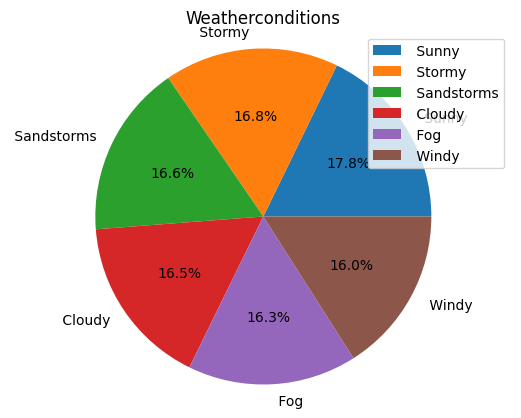

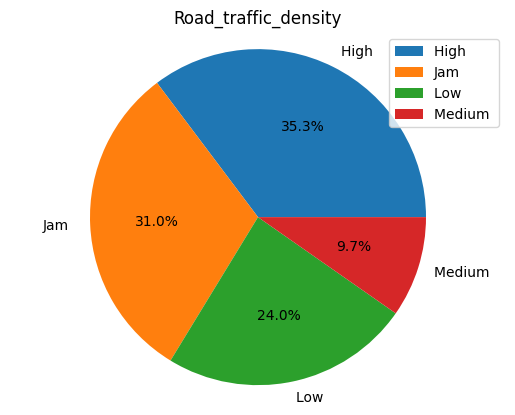

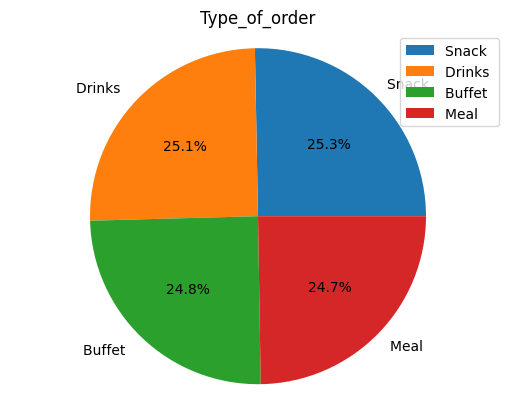

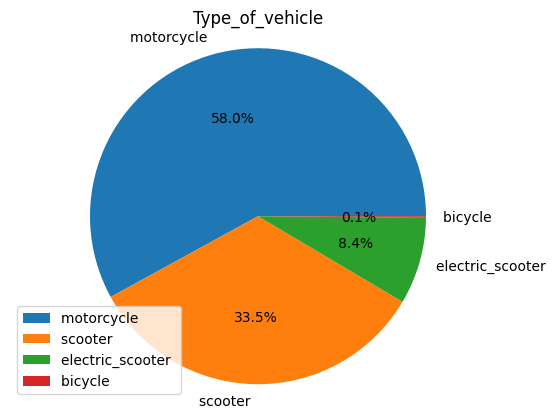

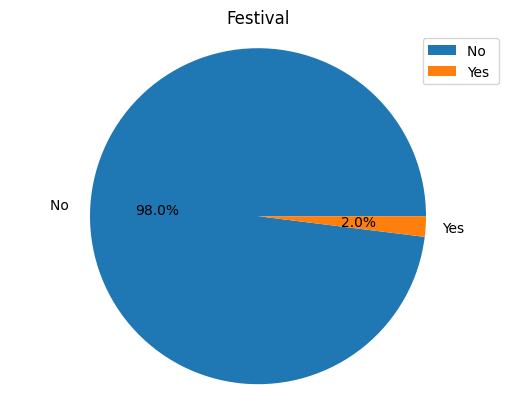

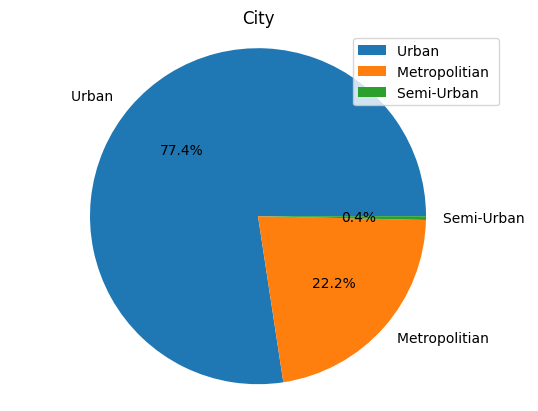

In [ ]:
x=[df['Weatherconditions'],df['Road_traffic_density'],df['Type_of_order'],df['Type_of_vehicle'],df['Festival'],df['City']]

for i in x:
  i=i.dropna()
  label=i.unique()
  plt.pie(i.value_counts(),labels=label,autopct="%1.1f%%")
  print('\n')
  plt.axis('equal')
  plt.title(i.name)
  plt.legend()
  plt.show()

## EDA

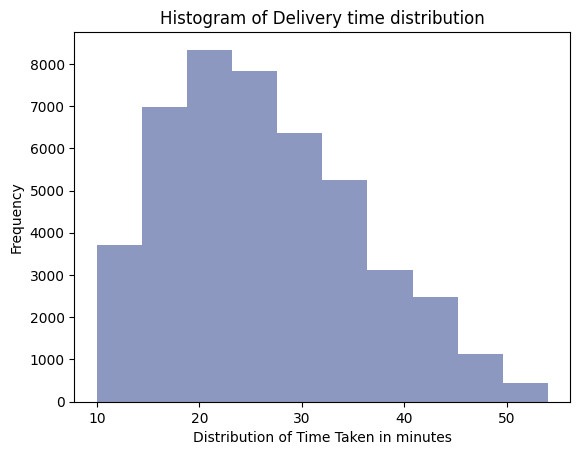

In [ ]:
# visualizing the target variable
plt.hist(df['Time_taken(min)'],color=(0.1, 0.2, 0.5, 0.5))  #coloring using RGBA value
plt.xlabel("Distribution of Time Taken in minutes")
plt.ylabel("Frequency")
plt.title("Histogram of Delivery time distribution")
plt.show()

The distribution rises fast, peaks between 20 and 30 mins and then falls slowly.

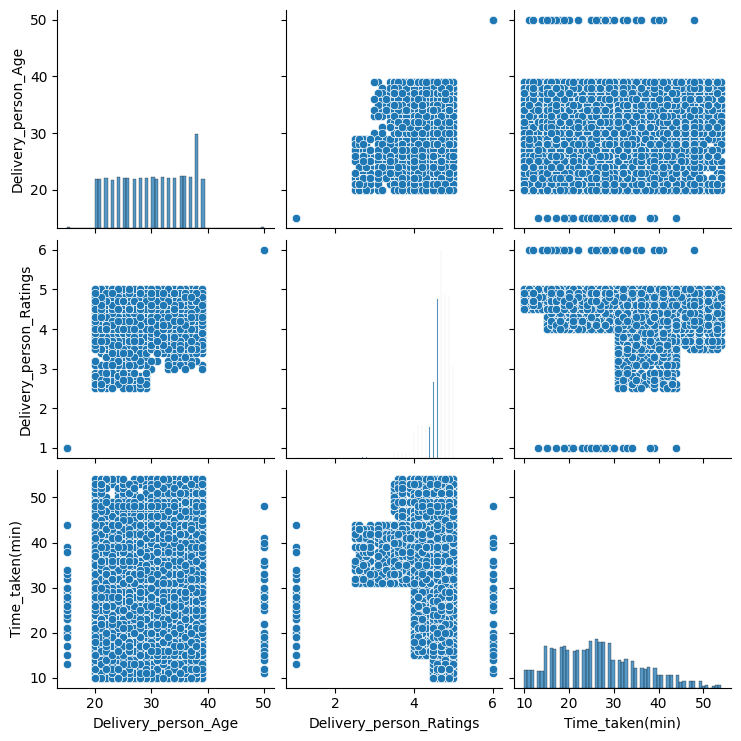

In [ ]:
#relationship between timetaken and Continuous data
cols = ['Delivery_person_Age','Delivery_person_Ratings','Time_taken(min)']
sns.pairplot(df[cols])

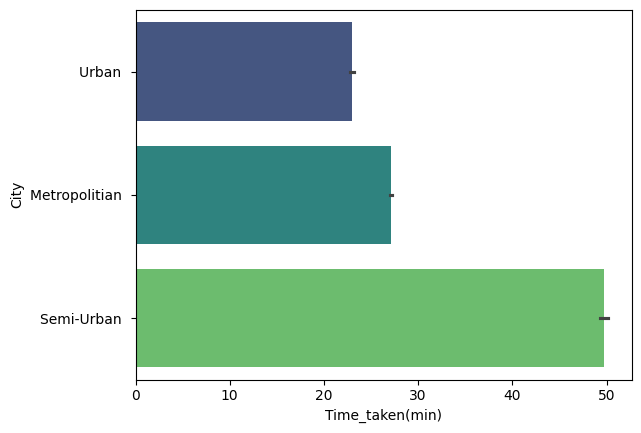

In [ ]:
#barplot
sns.barplot(x='Time_taken(min)',y='City',data=df,palette='viridis')
plt.show()

In [ ]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

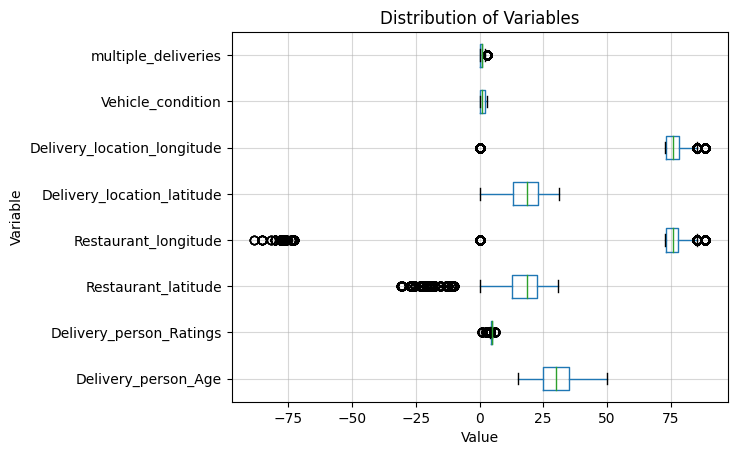

In [ ]:
#box plot
data=df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude','Vehicle_condition','multiple_deliveries']]
data.boxplot(vert=False)
plt.xlabel('Value')
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.5)
plt.show()

Boxplots shows outliers in each column

## Feature Engineering

In [ ]:
#creating new features from Order_date,Time_ordered and Time_order picked

def new_features(data):
  data['day']=data.Order_Date.dt.day
  data['month']=data.Order_Date.dt.month
  data['year']=data.Order_Date.dt.year
new_features(df)
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),day,month,year
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,2,Snack,motorcycle,0.0,No,Urban,24.0,19,3,2022
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,2,Snack,scooter,1.0,No,Metropolitian,33.0,25,3,2022


In [ ]:
df['year'].value_counts()

year
2022    45593
Name: count, dtype: int64

since the year is same for all we can drop that

..................................................................................

Converting 'Time Orderd' and Time order picked' to timedelta and finding the time of order prepared

In [ ]:
df['Time_Orderd']=pd.to_timedelta(df['Time_Orderd'])

In [ ]:
df['Time_Order_picked']=pd.to_timedelta(df['Time_Order_picked'])


In [ ]:
df['Time_Order_picked_1']=df['Order_Date']+np.where(df['Time_Order_picked']<df['Time_Orderd'],pd.DateOffset(days=1),pd.DateOffset(days=0))+df['Time_Order_picked']

In [ ]:
df['Time_Orderd_1']=df['Order_Date']+df['Time_Orderd']

In [ ]:
df['Time_Order_picked_1'].dtype

dtype('O')

In [ ]:
df['Time_Order_picked_1']=pd.to_datetime(df['Time_Order_picked_1'])

In [ ]:
df['order_prepare_time'] = (df['Time_Order_picked_1'] - df['Time_Orderd_1']).dt.total_seconds() / 60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   Delivery_person_Age          45593 non-null  float64        
 1   Delivery_person_Ratings      45593 non-null  float64        
 2   Restaurant_latitude          45593 non-null  float64        
 3   Restaurant_longitude         45593 non-null  float64        
 4   Delivery_location_latitude   45593 non-null  float64        
 5   Delivery_location_longitude  45593 non-null  float64        
 6   Order_Date                   45593 non-null  datetime64[ns] 
 7   Time_Orderd                  43862 non-null  timedelta64[ns]
 8   Time_Order_picked            45593 non-null  timedelta64[ns]
 9   Weatherconditions            45593 non-null  object         
 10  Road_traffic_density         45593 non-null  object         
 11  Vehicle_condition           

In [ ]:
df['order_prepare_time']=df['order_prepare_time'].fillna(df['order_prepare_time'].median())

In [ ]:
#dropping all time&date related columns
df.drop(df[['Order_Date','Time_Order_picked','Time_Orderd','Time_Order_picked_1','Time_Orderd_1','year']],axis=1,inplace=True)

In [ ]:
#finding distance between Restaurant and delivery location using longitude and latitude

df['distance_in_meters']=np.zeros(len(df))
restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_loc_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

In [ ]:
#installing haversine
!pip install haversine

In [ ]:
import haversine as hs
from haversine import Unit

In [ ]:
df['distance_in_meters']=np.array([hs.haversine(i,j,unit=Unit.METERS) for i,j in zip(restaurant_coordinates,delivery_loc_coordinates)])
df['distance_in_meters']

0         3025.153464
1        20183.557607
2         1552.759947
3         7790.412121
4         6210.146543
             ...     
45588     1489.847942
45589    11007.749968
45590     4657.201827
45591     6232.401659
45592    12074.412204
Name: distance_in_meters, Length: 45593, dtype: float64

In [ ]:
#removing the latitude and longitude columns
df.drop(df[['Delivery_location_latitude','Delivery_location_longitude','Restaurant_latitude','Restaurant_longitude']],axis=1,inplace=True)

In [ ]:
df.isna().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken(min)            0
day                        0
month                      0
order_prepare_time         0
distance_in_meters         0
dtype: int64

## Removing Outliers

In [ ]:
numerical_columns=df.drop(['Time_taken(min)'],axis=1).select_dtypes(include=['number'])
numerical_columns

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,day,month,order_prepare_time,distance_in_meters
0,37.0,4.9,2,0.0,19,3,15.0,3025.153464
1,34.0,4.5,2,1.0,25,3,5.0,20183.557607
2,23.0,4.4,0,1.0,19,3,15.0,1552.759947
3,38.0,4.7,0,1.0,5,4,10.0,7790.412121
4,32.0,4.6,1,1.0,26,3,15.0,6210.146543
...,...,...,...,...,...,...,...,...
45588,30.0,4.8,1,0.0,24,3,10.0,1489.847942
45589,21.0,4.6,0,1.0,16,2,15.0,11007.749968
45590,30.0,4.9,1,0.0,11,3,15.0,4657.201827
45591,20.0,4.7,0,1.0,7,3,5.0,6232.401659


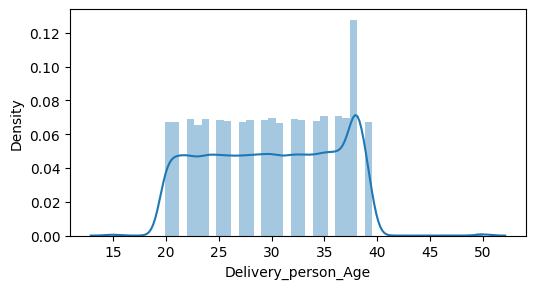

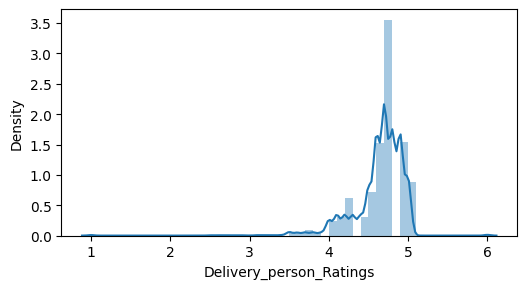

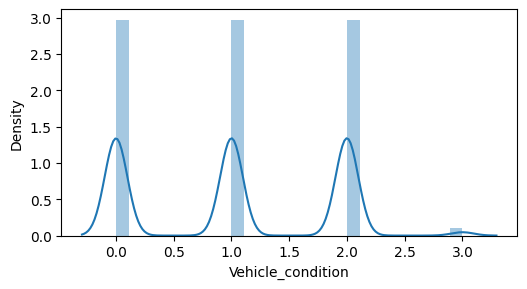

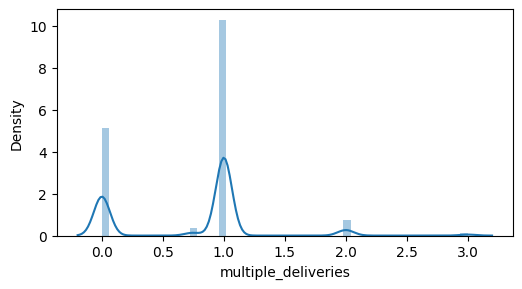

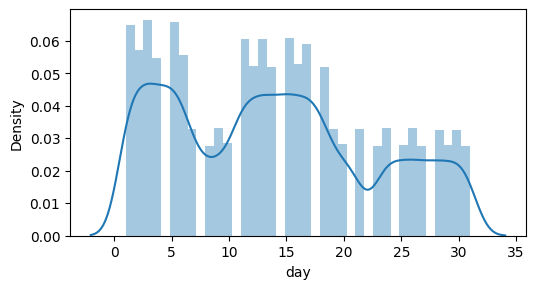

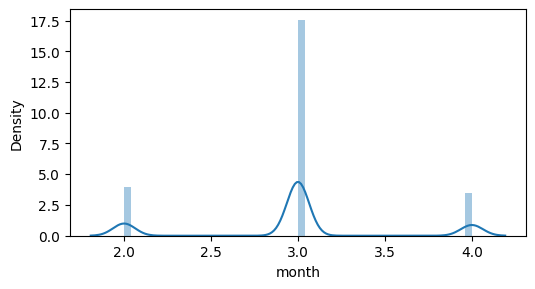

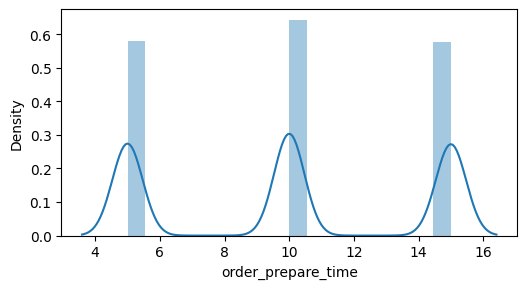

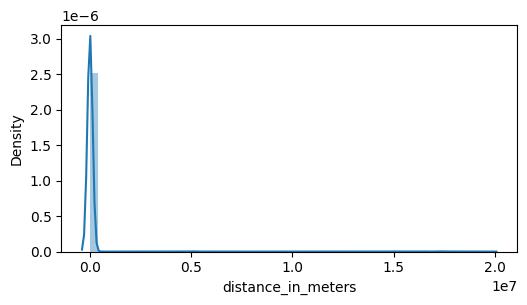

In [ ]:
# distribution plot for the features
for i,j in zip(numerical_columns,range(1,10)):
  plt.figure(figsize=(20,10))
  plt.subplot(3,3,j)
  sns.distplot(df[i])
  plt.show()

Here 'Delivery_person_Ratings' and 'distance_in_meters' has skewed distribution

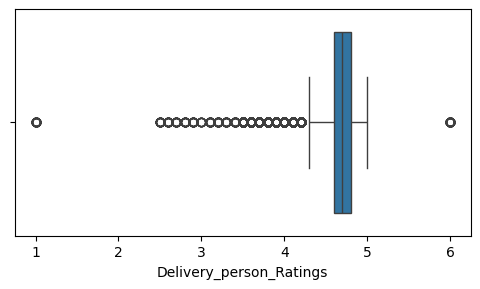

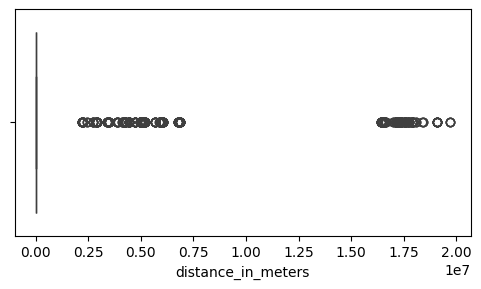

In [ ]:
#Boxplot for skewed featuers
for i,j in zip(['Delivery_person_Ratings','distance_in_meters'],range(1,10)):
  plt.figure(figsize=(20,10))
  plt.subplot(3,3,j)
  sns.boxplot(df[i],orient='h')
  plt.show()


In [ ]:
#finding IQR for Delivery_person_Ratings
skewed_data=['Delivery_person_Ratings','distance_in_meters']
#finding iqr
percentile25 = df['Delivery_person_Ratings'].quantile(0.25)
percentile75 = df['Delivery_person_Ratings'].quantile(0.75)
iqr = percentile75 - percentile25
#finding upper&lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#finding outliers
df[df['Delivery_person_Ratings'] > upper_limit]
df[df['Delivery_person_Ratings'] < lower_limit]
#trimming
new_df_rating = df.loc[(df['Delivery_person_Ratings'] >= lower_limit)&(df['Delivery_person_Ratings'] <= upper_limit)] #since there are ouliers in both sides
print(new_df_rating.shape)

(40248, 15)


In [ ]:
#finding iqr for distance_in_meters
percentile25 = df['distance_in_meters'].quantile(0.25)
percentile75 = df['distance_in_meters'].quantile(0.75)
iqr = percentile75 - percentile25
#finding upper&lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
#finding outliers
df[df['distance_in_meters'] > upper_limit]
df[df['distance_in_meters'] < lower_limit]
#trimming
new_df_dist = df[(df['distance_in_meters'] < upper_limit)] #since there are outliers only in right side
print(new_df_dist.shape)

(45162, 15)


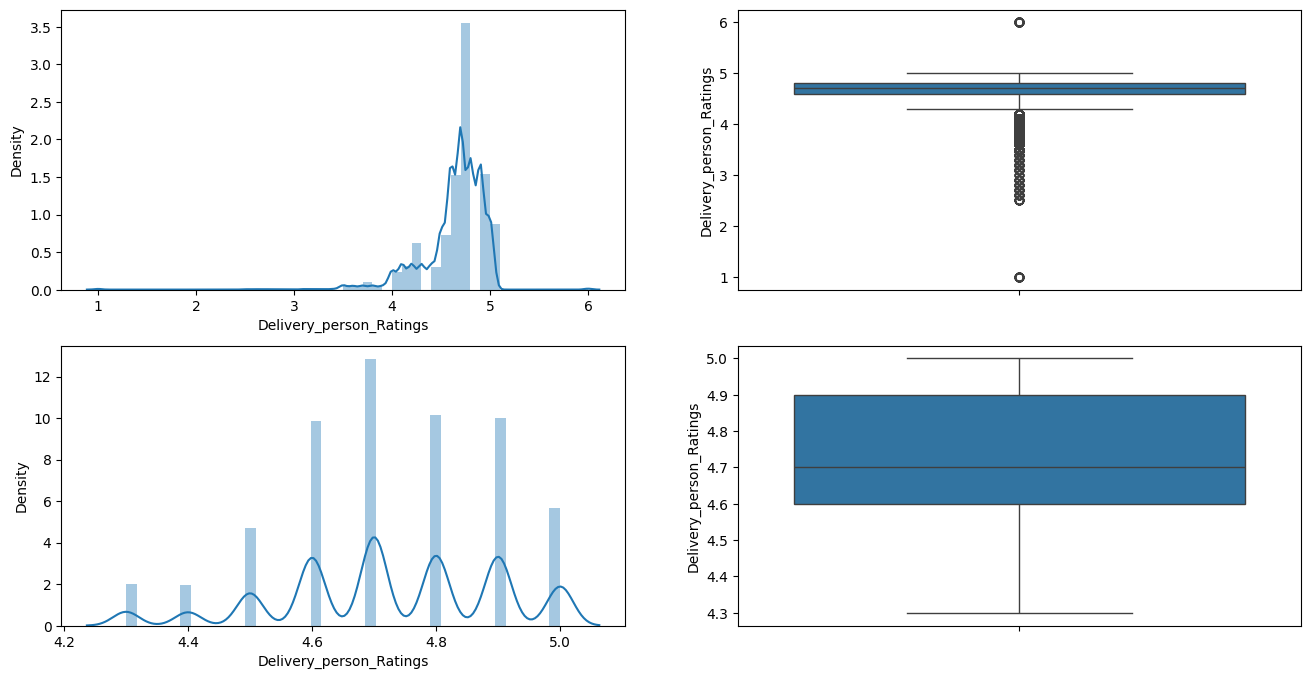

In [ ]:
#plotting after trimming
#for Delivery_person_Ratings
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Delivery_person_Ratings'])
plt.subplot(2,2,2)
sns.boxplot(df['Delivery_person_Ratings'])
plt.subplot(2,2,3)
sns.distplot(new_df_rating['Delivery_person_Ratings'])
plt.subplot(2,2,4)
sns.boxplot(new_df_rating['Delivery_person_Ratings'])
plt.show()


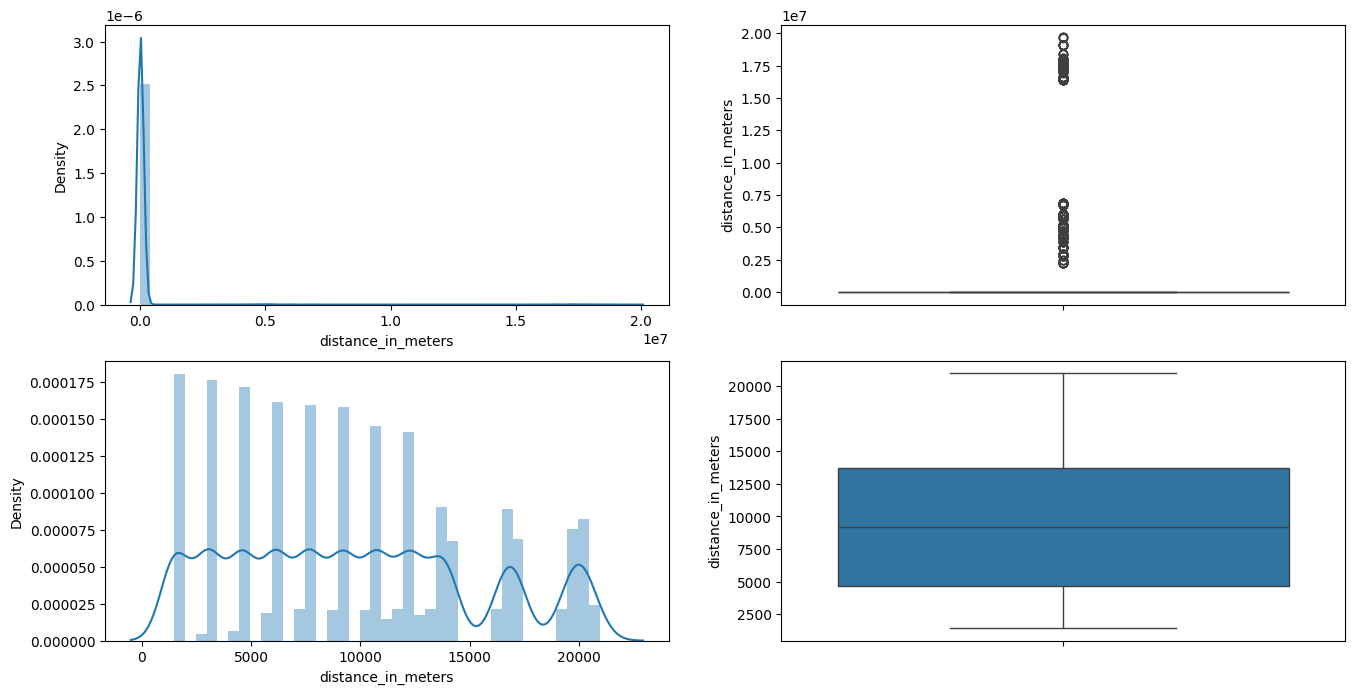

In [ ]:
#plotting after trimming
#for distance_in_meters
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['distance_in_meters'])
plt.subplot(2,2,2)
sns.boxplot(df['distance_in_meters'])
plt.subplot(2,2,3)
sns.distplot(new_df_dist['distance_in_meters'])
plt.subplot(2,2,4)
sns.boxplot(new_df_dist['distance_in_meters'])
plt.show()

In [ ]:
#capping
df_data = df.copy()

#capping for Delivery_person_Ratings
lower_limit_r=new_df_rating['Delivery_person_Ratings'].min()
upper_limit_r=new_df_rating['Delivery_person_Ratings'].max()
df_data['Delivery_person_Ratings'] = np.where((df['Delivery_person_Ratings'] < lower_limit_r),lower_limit_r,np.where((df['Delivery_person_Ratings'] > upper_limit_r),upper_limit_r,df['Delivery_person_Ratings']))




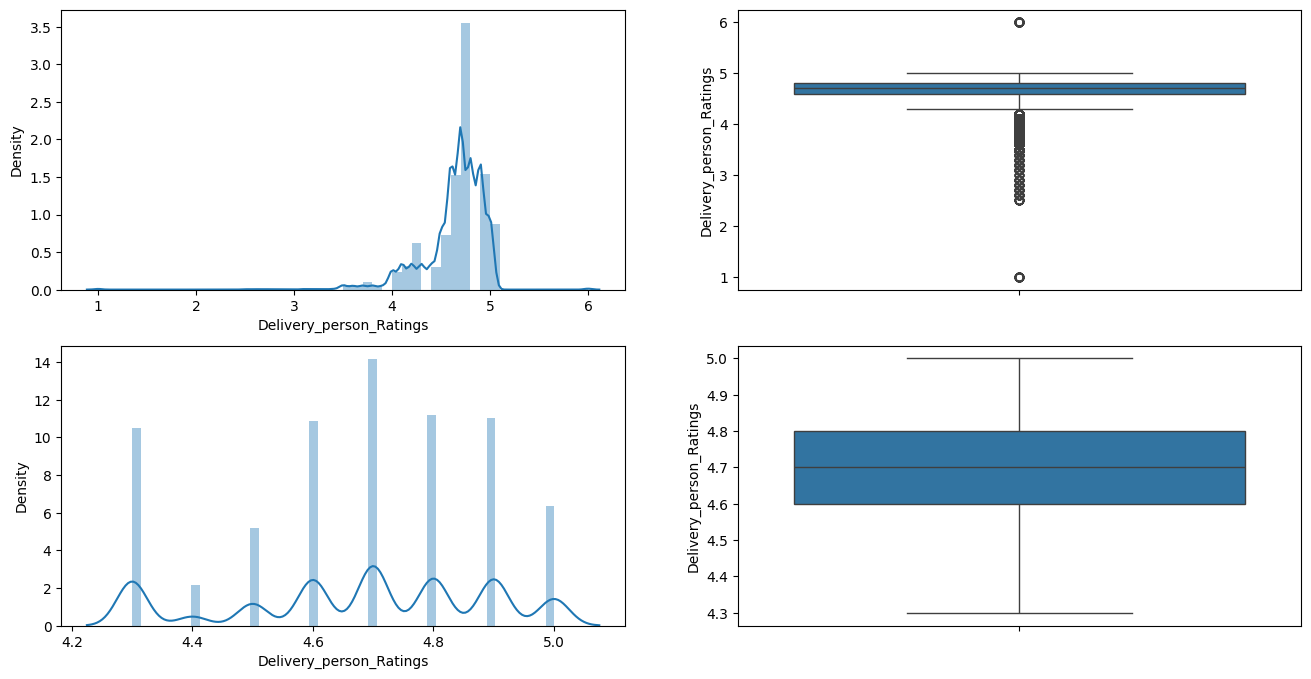

In [ ]:
#comparing plots after capping for Delivery_person_Ratings
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Delivery_person_Ratings'])
plt.subplot(2,2,2)
sns.boxplot(df['Delivery_person_Ratings'])
plt.subplot(2,2,3)
sns.distplot(df_data['Delivery_person_Ratings'])
plt.subplot(2,2,4)
sns.boxplot(df_data['Delivery_person_Ratings'])
plt.show()

In [ ]:
#capping for distance_in_meters
lower_limit_d=new_df_dist['distance_in_meters'].min()
upper_limit_d=new_df_dist['distance_in_meters'].max()
df_data['distance_in_meters'] = np.where(df_data['distance_in_meters'] > upper_limit_d,upper_limit_d,df_data['distance_in_meters'])

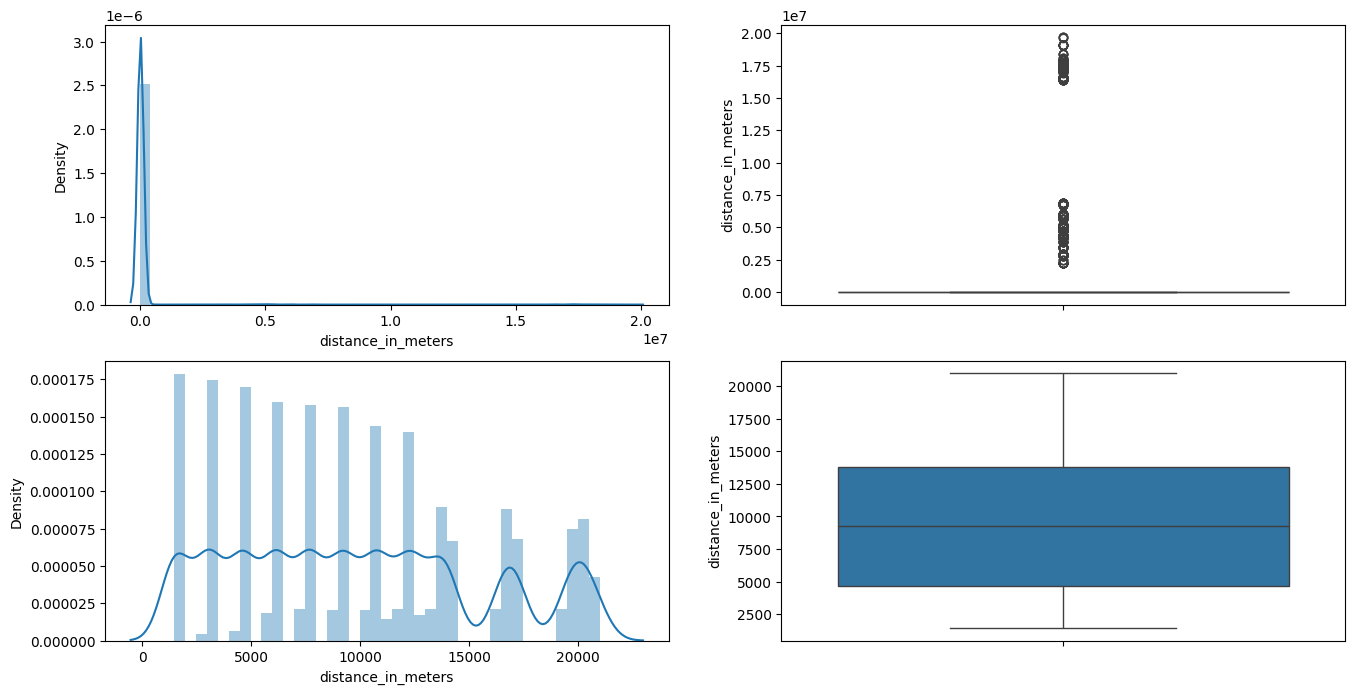

In [ ]:
#comparing plots after capping for distance_in_meters
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['distance_in_meters'])
plt.subplot(2,2,2)
sns.boxplot(df['distance_in_meters'])
plt.subplot(2,2,3)
sns.distplot(df_data['distance_in_meters'])
plt.subplot(2,2,4)
sns.boxplot(df_data['distance_in_meters'])
plt.show()


In [ ]:
df_data.isna().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
Weatherconditions          0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken(min)            0
day                        0
month                      0
order_prepare_time         0
distance_in_meters         0
dtype: int64

## Feature encoding

In [ ]:
df_data.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Weatherconditions           object
Road_traffic_density        object
Vehicle_condition            int64
Type_of_order               object
Type_of_vehicle             object
multiple_deliveries        float64
Festival                    object
City                        object
Time_taken(min)            float64
day                          int32
month                        int32
order_prepare_time         float64
distance_in_meters         float64
dtype: object

In [ ]:
def label_encoding(df):
    obj_columns=df_data.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[obj_columns] = df[obj_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df_data)


In [ ]:
df_data.head(3)

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),day,month,order_prepare_time,distance_in_meters
0,37.0,4.9,4,0,2,3,2,0.0,0,2,24.0,19,3,15.0,3025.153464
1,34.0,4.5,3,1,2,3,3,1.0,0,0,33.0,25,3,5.0,20183.557607
2,23.0,4.4,2,2,0,1,2,1.0,0,2,26.0,19,3,15.0,1552.759947


<Axes: >

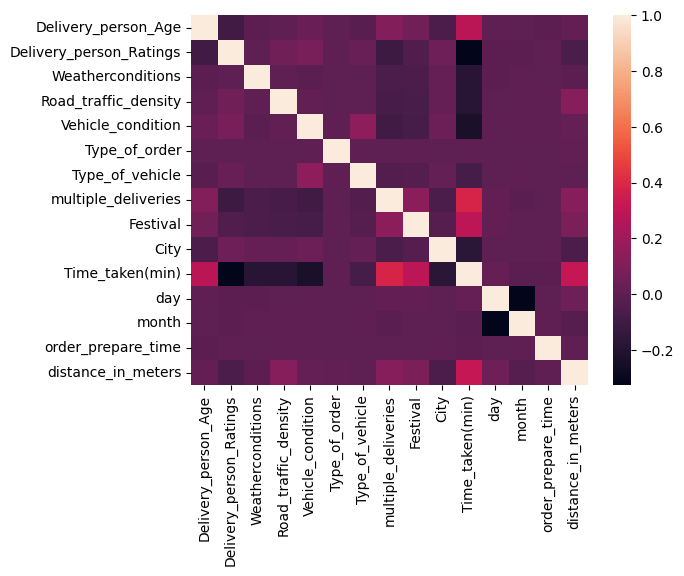

In [ ]:
#checking correlation for feature selection
sns.heatmap(df_data.corr())

## Splitting into Training and Testing data

In [ ]:
#importing grid search cv
from sklearn.model_selection import GridSearchCV

In [ ]:
#selecting features
x=df_data.drop('Time_taken(min)',axis=1)
#Target variable
y=df_data['Time_taken(min)']

In [ ]:
print("Dimention of x:",x.ndim,"\nDimension of y:",y.ndim)

Dimention of x: 2 
Dimension of y: 1


Now since the problem is multiple regression plotting each features with dependent variable

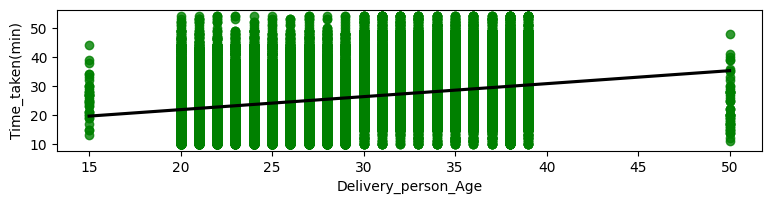

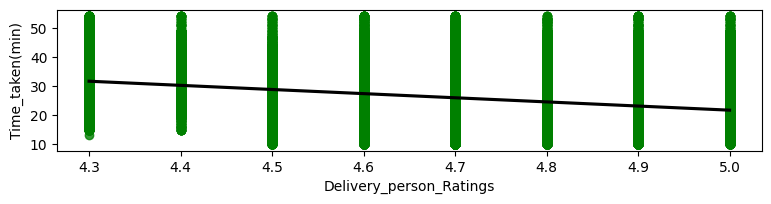

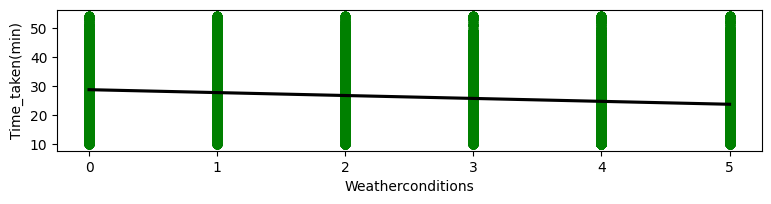

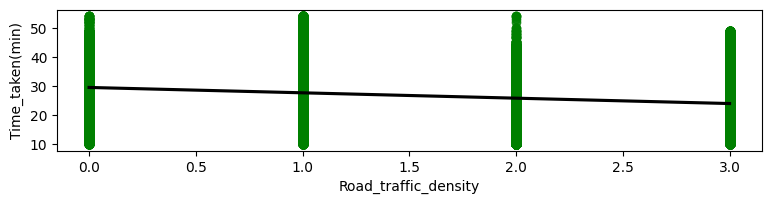

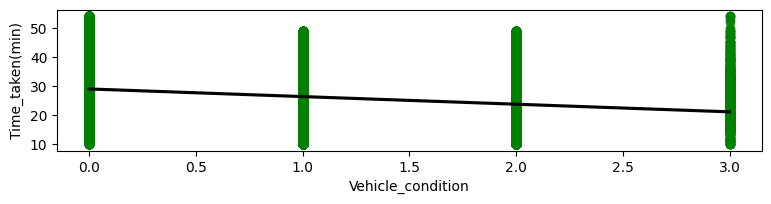

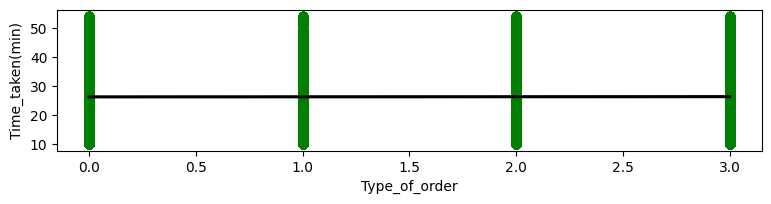

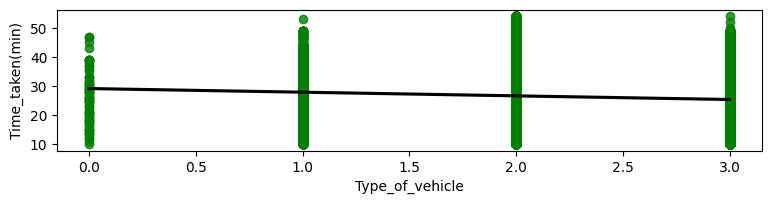

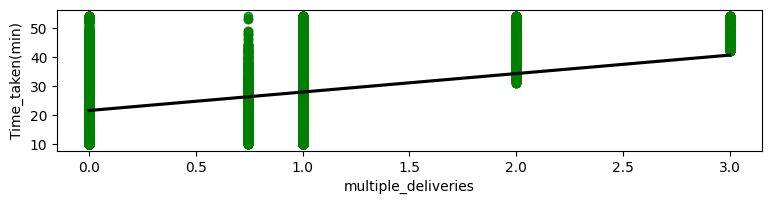

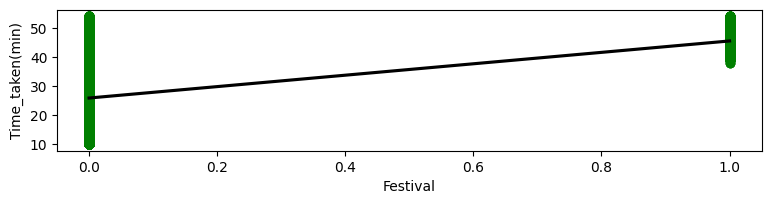

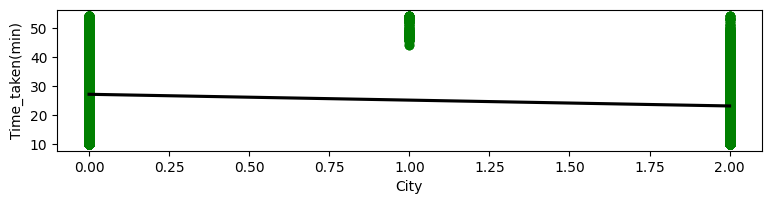

In [ ]:
#regplot
features=x

for i,j in zip(x,range(1,11)):
  plt.figure(figsize=(20,15))
  plt.subplot(7,2,j)
  sns.regplot(x=df_data[i],y=y,scatter_kws={"color": "g"}, line_kws={"color": "black"})
  # plt.title(["Rgression plot for",i,"with Time_taken(min)"],color='k')


In [ ]:
#splitting into training and tesing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
x_train

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,day,month,order_prepare_time,distance_in_meters
14782,32.0,4.7,1,3,1,1,3,1.0,0,0,13,3,10.0,7546.371566
7752,38.0,4.7,2,2,3,3,1,1.0,0,2,20,3,10.0,13405.902369
5986,33.0,4.7,3,1,0,3,2,0.0,0,0,2,3,10.0,11914.610534
20214,29.0,4.6,2,2,2,1,2,1.0,0,0,15,2,10.0,7441.042027
1953,39.0,4.6,2,2,1,3,2,1.0,0,0,16,2,15.0,20886.828876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,37.0,4.9,4,3,2,2,3,1.0,0,0,23,3,15.0,17139.243416
44732,34.0,4.9,4,1,2,3,2,1.0,0,0,4,3,15.0,13407.111212
38158,39.0,4.9,5,0,0,2,2,0.0,0,0,1,3,10.0,6122.103256
860,25.0,4.9,5,3,2,2,3,1.0,0,0,26,3,5.0,7760.948496


##Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Perform standardization on the training data
x_train = scaler.transform(x_train)

# Perform standardization on the testing data
x_test = scaler.transform(x_test)

## Model Creation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

linear_model=LinearRegression()
tree_model=DecisionTreeRegressor()
forest_model=RandomForestRegressor()
xgb_model=xgb.XGBRegressor()
lst=[linear_model,tree_model,forest_model,xgb_model]
for i in lst:
  print("Regressior:",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  # print("Slope is")
  # print(list(zip(x,i.coef_)))
  # print("Constant is:",i.intercept_)
  print("Performance evaluvation\n",20*"*")
  print("MAE",mean_absolute_error(y_test,y_pred))
  print("MAPE",mean_absolute_percentage_error(y_test,y_pred))
  print("MSE",mean_squared_error(y_test,y_pred))
  print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
  print("R2 score ",r2_score(y_test,y_pred))
  print("\n")

Regressior: LinearRegression()
Performance evaluvation
 ********************
MAE 5.412521573541327
MAPE 0.24217367134039502
MSE 45.56147585776874
RMSE 6.74992413718619
R2 score  0.4808881610460989


Regressior: DecisionTreeRegressor()
Performance evaluvation
 ********************
MAE 4.204671735633864
MAPE 0.18075000973993977
MSE 30.83796973241702
RMSE 5.553194552004911
R2 score  0.6486427431066164


Regressior: RandomForestRegressor()
Performance evaluvation
 ********************
MAE 3.1937943639072826
MAPE 0.13831617619953576
MSE 16.393997925296105
RMSE 4.048950225094908
R2 score  0.8132124069603466


Regressior: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=N

## Performing Hyper Parameter tunning

In [ ]:
#giving parameters
lst1=[linear_model,tree_model,xgb_model]
linear_para={"n_jobs":[1,2,3,4,5]}
tree_para={"max_depth":[3,4,5,6,7],"min_samples_split":[2,3,4,1]}
xgb_para={'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]}
params=[linear_para,tree_para,xgb_para]
for i,j in zip(lst1,params):
  print("Best parameters and score:",i)
  gd=GridSearchCV(i,j,cv=10,scoring='r2')
  gd.fit(x_train,y_train)
  print("Best parameters:",gd.best_params_)
  print("Best Score is:",gd.best_score_)
  print("\n")

Best parameters and score: LinearRegression()
Best parameters: {'n_jobs': 1}
Best Score is: 0.4764262286070621


Best parameters and score: DecisionTreeRegressor()
Best parameters: {'max_depth': 7, 'min_samples_split': 3}
Best Score is: 0.7333595091601113


Best parameters and score: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tre

In [ ]:
linear_model=LinearRegression(n_jobs= 1)
tree_model=DecisionTreeRegressor(max_depth= 7,min_samples_split= 2)
forest_model=RandomForestRegressor(n_estimators = 200,random_state = 42)
xgb_model=xgb.XGBRegressor(max_depth=7,n_estimators=20)

lst=[linear_model,tree_model,forest_model,xgb_model]
for i in lst:
  print("Regressior:",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  # print("Slope is")
  # print(list(zip(x,i.coef_)))
  # print("Constant is:",i.intercept_)
  print("Performance evaluvation\n",20*"*")
  print("MAE",mean_absolute_error(y_test,y_pred))
  print("MAPE",mean_absolute_percentage_error(y_test,y_pred))
  print("MSE",mean_squared_error(y_test,y_pred))
  print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
  print("R2 score ",r2_score(y_test,y_pred))
  print("\n")

Regressior: LinearRegression(n_jobs=1)
Performance evaluvation
 ********************
MAE 5.412521573541327
MAPE 0.24217367134039502
MSE 45.56147585776874
RMSE 6.74992413718619
R2 score  0.4808881610460989


Regressior: DecisionTreeRegressor(max_depth=7)
Performance evaluvation
 ********************
MAE 3.79937905108005
MAPE 0.1694595370928967
MSE 23.46782826472834
RMSE 4.8443604598262855
R2 score  0.7326156087483231


Regressior: RandomForestRegressor(n_estimators=200, random_state=42)
Performance evaluvation
 ********************
MAE 3.1883535696008187
MAPE 0.13822224982917972
MSE 16.317320227529617
RMSE 4.039470290462552
R2 score  0.814086046366115


Regressior: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance

###Based on the evaluation, XGBoost emerges as the top-performing algorithm for the food delivery data

An R2 score of 0.82 implies that the model can explain approximately 82% of the variance in the food delivery time based on the provided features.